In [1]:
import pandas as pd
import requests
from pathlib import Path
import os
import matplotlib.pyplot as plt
import urllib

In [2]:
BASE_URL = "https://raw.githubusercontent.com/Welltory/hrv-covid19/master/data"

In [3]:
files = ['blood_pressure.csv', 'heart_rate.csv', 'hrv_measurements.csv', 'participants.csv', 
         'scales_description.csv', 'sleep.csv', 'surveys.csv', 'wearables.csv', 'weather.csv']
path = Path("./data")
path.mkdir(exist_ok=True)

# Download each file
for file in files:
    filename = path/file
    url = f"{BASE_URL}/{file}"
    # If the file does not already exist in the directory, download it
    if not os.path.exists(filename):
        urllib.request.urlretrieve(url,filename)

In [4]:
df = pd.read_csv("data/blood_pressure.csv")

In [5]:
df.isna().sum(axis = 0)

user_code                     0
measurement_datetime          0
diastolic                     0
systolic                      0
functional_changes_index    422
circulatory_efficiency      422
kerdo_vegetation_index      438
robinson_index              422
dtype: int64

In [6]:
df

,user_code,measurement_datetime,diastolic,systolic,functional_changes_index,circulatory_efficiency,kerdo_vegetation_index,robinson_index
0,01bad5a519,2020-04-29 22:33:33,100,150,NaN,NaN,NaN,NaN
1,01bad5a519,2020-04-30 01:33:33,100,150,NaN,NaN,NaN,NaN
2,01bad5a519,2020-04-30 09:16:38,95,140,3.38,4545.0,6.0,141.40
3,01bad5a519,2020-04-30 12:16:38,95,140,NaN,NaN,NaN,NaN
4,01bad5a519,2020-05-01 06:58:06,80,130,2.89,4000.0,NaN,104.00
...,...,...,...,...,...,...,...,...
716,fde84801d8,2020-06-03 14:50:51,81,114,NaN,NaN,NaN,NaN
717,fde84801d8,2020-06-07 10:14:35,76,113,2.59,2664.0,-6.0,81.36
718,fde84801d8,2020-06-07 13:14:35,76,113,NaN,NaN,NaN,NaN
719,fde84801d8,2020-06-12 12:43:59,79,108,2.64,2349.0,2.0,87.48


### Data context and sampling

#### Data context

- This dataset measures heart rate variability and other parameters for different users in an attempt to boost the health and immunity of people.
- There is no Personally Identifiable information in the dataset (PII) as mentioned in the README. The participants of this data collection process are and will remain anonymous.
- The dataset is published under a Creative Commons License.
- A full description of the schema of the dataset has been documented on the [original github repo](https://github.com/Welltory/hrv-covid19/blob/master/datatypes.md), to summarize:
    - A `participants` table notes the physical characteristics of a user (height, weight, gender, country, etc.). Each user has a unique user ID which is then used in all the other tables.
    - A `heart_rate` table contains time series data, that records their hear rates, and if they are resting or not at that time instant.
    - A `blood_pressure` table records the systolic and diastolic blood pressure measurements, among other measurements.
    - A `sleep` table records the duration of sleep, the duration of being awake in bed, among other measurements.
    
#### Data sampling

- It could be said that there is a selection bias while collecting the dataset, since only those with the Bluetooth enabled heart monitor could be considered as participants and their data collected for study.
- It's a form of convenience sampling, to take data from those who already wear such a monitor.

### Explore and interpret data structure, descriptive statistics, data quality, and variable relationships

In [7]:
participants_df = pd.read_csv("data/participants.csv")

In [8]:
participants_df

,user_code,gender,age_range,city,country,height,weight,symptoms_onset
0,007b8190cf,m,25-34,Mandalay,Myanmar,170.18,96.162,NaN
1,013f6d3e5b,f,18-24,São Paulo,Brazil,174.00,77.300,5/15/2020
2,01bad5a519,m,45-54,St Petersburg,Russia,178.00,92.000,4/5/2020
3,0210b20eea,f,25-34,Sochi,Russia,169.00,60.000,5/6/2020
4,024719e7da,f,45-54,St Petersburg,Russia,158.00,68.500,5/27/2020
...,...,...,...,...,...,...,...,...
180,fd387f6269,f,35-44,Attleboro,United States,165.00,115.439,5/1/2020
181,fdc881a0a8,f,55-64,Moscow,Russia,160.00,53.000,NaN
182,fde84801d8,f,45-54,Tambov,Russia,168.00,79.500,4/16/2020
183,fe5ca7e4ea,m,35-44,Dar es Salaam,Tanzania,168.00,87.500,NaN


In [9]:
participants_df[["height", "weight"]].describe()

,height,weight
count,183.000000,185.000000
mean,169.976393,77.927757
std,12.400103,19.552541
min,132.080000,43.500000
25%,163.500000,63.500000
50%,168.000000,74.344000
75%,174.500000,90.537000
max,250.000000,154.221000


- Each participant's age range, city and country, height, weight, and when they started experiencing symptoms have been noted.
- Participants had an average height of ~170 cm and average weight of ~78 kg.
- The meadian height is 168 cm, while the median weight is 74.3 kg
- Standard height deviation from mean is 12.4 cm, while standard weight deviation from mean is 19.55 kg

In [10]:
participants_df.isna().sum(axis = 0)

user_code          0
gender             0
age_range          0
city              12
country            6
height             2
weight             0
symptoms_onset    38
dtype: int64

- 12 cities haven't been noted, 6 countries, 2 heights have not been noted, and 38 rows of people either did not have symptoms or their data was not collected.

In [11]:
heart_rate_df = pd.read_csv("data/heart_rate.csv")

In [12]:
heart_rate_df

,user_code,datetime,heart_rate,is_resting
0,007b8190cf,2020-04-26 04:49:25,70,0
1,01bad5a519,2020-04-23 06:21:03,74,0
2,01bad5a519,2020-04-23 09:46:01,82,0
3,01bad5a519,2020-04-23 14:05:06,90,0
4,01bad5a519,2020-04-24 03:41:18,72,0
...,...,...,...,...
523778,fe5ca7e4ea,2020-05-23 06:31:33,85,0
523779,fe6c1b1349,2020-05-07 12:05:04,68,0
523780,fe6c1b1349,2020-05-10 06:32:00,70,0
523781,fe6c1b1349,2020-05-12 06:31:42,77,0


In [13]:
heart_rate_df.describe()

,heart_rate,is_resting
count,523783.000000,523783.000000
mean,90.856626,0.005546
std,25.054152,0.074266
min,10.000000,0.000000
25%,71.000000,0.000000
50%,87.000000,0.000000
75%,108.000000,0.000000
max,232.000000,1.000000


#### The following statistics are for all users across all dates for which data was recorded :

- The mean heart rate is ~91
- The median heart rate is 87

In [14]:
heart_rate_df.isna().sum(axis = 0)

user_code     0
datetime      0
heart_rate    0
is_resting    0
dtype: int64

- No data is missing for the `heart_rate` csv, data across all times and all users has been recorded.

In [15]:
sleep_csv = pd.read_csv("data/sleep.csv")

In [16]:
sleep_csv

,user_code,day,sleep_begin,sleep_end,sleep_duration,sleep_awake_duration,sleep_rem_duration,sleep_light_duration,sleep_deep_duration,pulse_min,pulse_max,pulse_average
0,0d297d2410,2019-12-31,2019-12-31 07:50:32,2019-12-31 08:45:22,3290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0d297d2410,2020-01-01,2020-01-01 04:13:41,2020-01-01 09:45:02,19881.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0d297d2410,2020-01-02,2020-01-02 02:14:52,2020-01-02 08:06:00,21068.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0d297d2410,2020-01-03,2020-01-03 00:10:00,2020-01-03 08:45:10,30910.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0d297d2410,2020-01-04,2020-01-04 01:27:25,2020-01-04 08:52:20,26695.0,NaN,NaN,21480.0,NaN,55.0,95.0,72.5
...,...,...,...,...,...,...,...,...,...,...,...,...
420,fcf3ea75b0,2020-04-22,2020-04-22 00:23:22,2020-04-22 07:17:23,24841.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421,fcf3ea75b0,2020-04-23,2020-04-22 22:40:51,2020-04-23 07:04:35,30224.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
422,fcf3ea75b0,2020-05-06,2020-05-05 21:48:53,2020-05-06 08:02:09,36796.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
423,fcf3ea75b0,2020-05-06,2020-05-06 00:18:53,2020-05-06 10:32:09,36796.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
sleep_csv.describe()

,sleep_duration,sleep_awake_duration,sleep_rem_duration,sleep_light_duration,sleep_deep_duration,pulse_min,pulse_max,pulse_average
count,425.000000,9.000000,7.000000,27.000000,14.000000,15.000000,15.000000,15.000000
mean,25699.731765,2733.333333,6518.571429,14514.740741,4280.285714,60.533333,89.866667,68.880733
std,7773.805470,671.900290,2081.613385,8078.126290,2089.766547,12.844491,10.541528,10.947268
min,930.000000,1740.000000,2820.000000,300.000000,480.000000,52.000000,62.000000,59.444000
25%,21857.000000,2460.000000,5730.000000,7995.000000,2797.500000,54.500000,85.000000,63.393000
50%,26041.000000,2490.000000,6240.000000,17340.000000,4230.000000,58.000000,93.000000,65.857000
75%,30600.000000,2790.000000,8190.000000,20340.000000,5550.000000,60.000000,94.500000,70.250000
max,47460.000000,4200.000000,8730.000000,23100.000000,7934.000000,105.000000,105.000000,105.000000


## Explore data visually with appropriate visualizations

Text(0, 0.5, 'Weight (in pounds)')

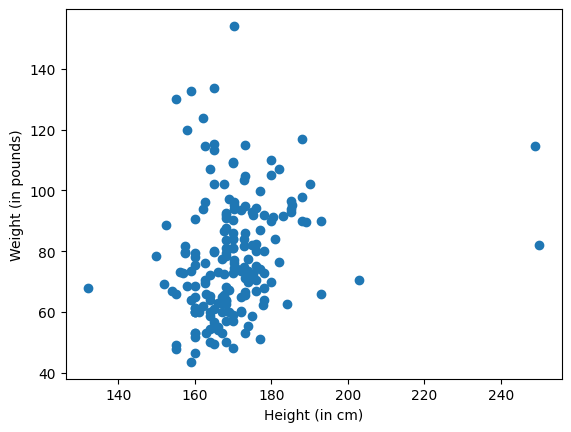

In [18]:
plt.scatter(participants_df[['height']], participants_df[['weight']])
plt.xlabel('Height (in cm)')
plt.ylabel('Weight (in pounds)')

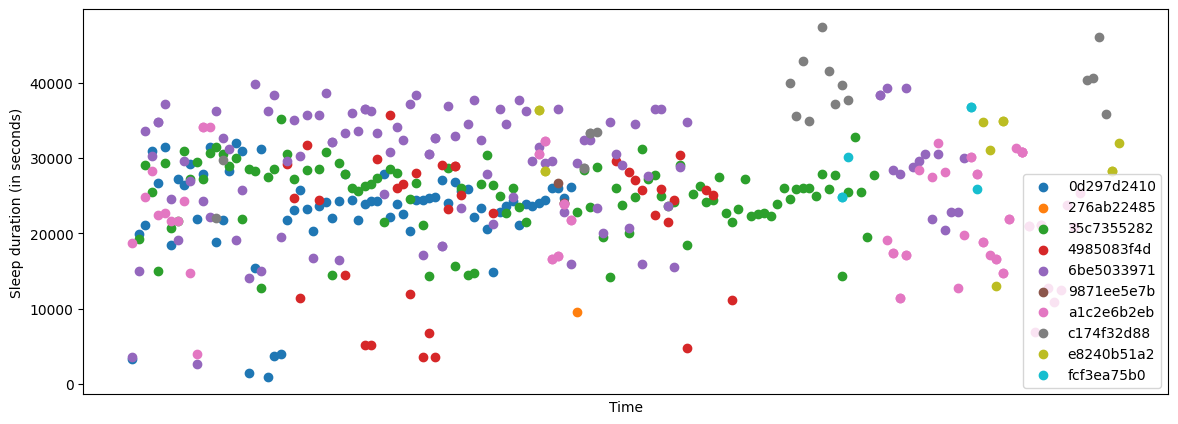

In [19]:
import numpy as np
plt.figure(figsize = (14, 5))
user_codes = sleep_csv.get('user_code').unique()
for user_code in user_codes:
    idxs = sleep_csv.user_code.isin([user_code])
    h = sleep_csv[idxs].get('sleep_duration').to_numpy()
    times = sleep_csv[idxs].get('day').to_numpy()
    x_axis = np.arange(h.size)
    plt.scatter(times, h, label = user_code)
#     plt.plot(times, h)
plt.xlabel('Time')
plt.xticks([])

plt.ylabel('Sleep duration (in seconds)')
    
plt.legend()


Text(0.5, 1.0, 'Legend hidden due to large size')

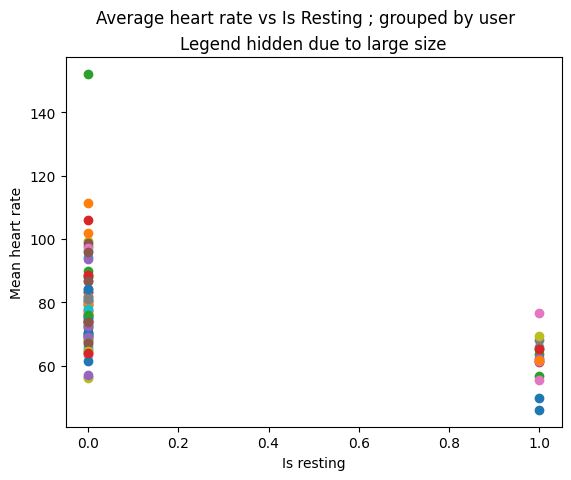

In [20]:
grouped_heart_rates = heart_rate_df[['user_code', 'heart_rate', 'is_resting']].groupby(['user_code', 'is_resting']).mean()
indices = grouped_heart_rates.index
for index in indices:
    grouped_heart_rate_user = grouped_heart_rates.loc[index]
    plt.scatter(index[1], grouped_heart_rate_user, label = index[0])
# plt.legend()    
plt.xlabel('Is resting')
plt.ylabel('Mean heart rate')
plt.suptitle('Average heart rate vs Is Resting ; grouped by user')
plt.title('Legend hidden due to large size')

Text(0.5, 1.0, 'Legend hidden due to large number of users')

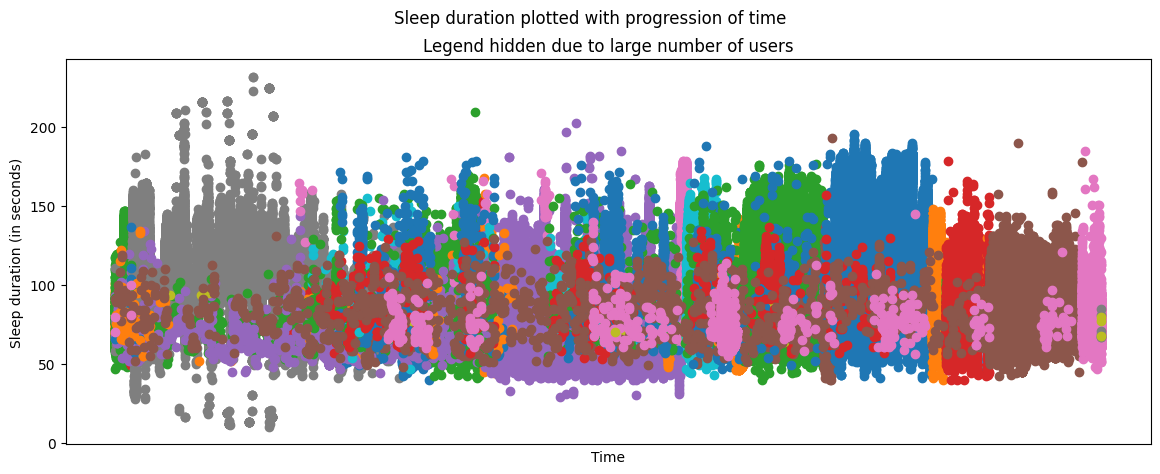

In [21]:
plt.figure(figsize = (14, 5))
user_codes = heart_rate_df.get('user_code').unique()
for user_code in user_codes:
    idxs = heart_rate_df.user_code.isin([user_code])
    h = heart_rate_df[idxs].get('heart_rate').to_numpy()
    times = heart_rate_df[idxs].get('datetime').to_numpy()
    plt.scatter(times, h, label = user_code)
plt.xlabel('Time')
plt.xticks([])

plt.ylabel('Sleep duration (in seconds)')
plt.suptitle('Sleep duration plotted with progression of time')
plt.title('Legend hidden due to large number of users')

#### Variable relationships

In [22]:
height_weight = participants_df[["height", "weight"]].dropna()

In [23]:
a = height_weight["height"] - height_weight["height"].mean()

In [24]:
b = height_weight["weight"] - height_weight["weight"].mean()

In [25]:
corr = (a * b).sum() / (np.linalg.norm(a) * np.linalg.norm(b))

In [26]:
print(f"Correlation coefficient between height and weight is {corr}")

Correlation coefficient between height and weight is 0.2274130778591709


In [27]:
df

,user_code,measurement_datetime,diastolic,systolic,functional_changes_index,circulatory_efficiency,kerdo_vegetation_index,robinson_index
0,01bad5a519,2020-04-29 22:33:33,100,150,NaN,NaN,NaN,NaN
1,01bad5a519,2020-04-30 01:33:33,100,150,NaN,NaN,NaN,NaN
2,01bad5a519,2020-04-30 09:16:38,95,140,3.38,4545.0,6.0,141.40
3,01bad5a519,2020-04-30 12:16:38,95,140,NaN,NaN,NaN,NaN
4,01bad5a519,2020-05-01 06:58:06,80,130,2.89,4000.0,NaN,104.00
...,...,...,...,...,...,...,...,...
716,fde84801d8,2020-06-03 14:50:51,81,114,NaN,NaN,NaN,NaN
717,fde84801d8,2020-06-07 10:14:35,76,113,2.59,2664.0,-6.0,81.36
718,fde84801d8,2020-06-07 13:14:35,76,113,NaN,NaN,NaN,NaN
719,fde84801d8,2020-06-12 12:43:59,79,108,2.64,2349.0,2.0,87.48


In [28]:
a = df["diastolic"] - df["diastolic"].mean()

In [29]:
b = df["systolic"] - df["systolic"].mean()

In [30]:
corr = (a * b).sum() / (np.linalg.norm(a) * np.linalg.norm(b))

In [31]:
print(f"Correlation coefficient between systolic and diastolic blood pressures is {corr}")

Correlation coefficient between systolic and diastolic blood pressures is 0.5813256828331568


- There is little correlation between the height and weight of people, but there is a stronger relationship between the systolic and diastolic blood pressures.

### Discuss and implement strategies for Handling Missing Values, Removing Duplicates, and Handling Outliers

In [32]:
heart_rate_df.isna().sum(axis = 0)

user_code     0
datetime      0
heart_rate    0
is_resting    0
dtype: int64

- The heart rate data has no missing values, can be seen above.

In [33]:
sleep_csv.isna().sum(axis = 0)

user_code                 0
day                       0
sleep_begin               0
sleep_end                 0
sleep_duration            0
sleep_awake_duration    416
sleep_rem_duration      418
sleep_light_duration    398
sleep_deep_duration     411
pulse_min               410
pulse_max               410
pulse_average           410
dtype: int64

In [34]:
sleep_csv.shape

(425, 12)

- From the 425 rows in `sleep.csv`, 416 rows have missing "sleep_awake_duration" values. We can 
    - Choose to ignore this column of the csv.
    - Choose the column to analyze, and deal with the null values
    
- There are 2 ways of dealing with null values:
    - Dropping the rows which contain the null values.
    - Interpolating the missing data based on domain knowledge.
    
- Since we do not have domain knowledge regarding sleep durations, we will show how to drop missing values, if only "sleep_awake_duration" is considered. It will drop most of the rows, but we shall show that for demonstration purposes.

In [35]:
truncated_sleep_csv = sleep_csv[['user_code', 'day', 'sleep_begin', 'sleep_end', 'sleep_duration', 'sleep_awake_duration']]

In [36]:
idxs = truncated_sleep_csv['sleep_awake_duration'].notna()
assert(np.logical_not(idxs).sum() == 416)

In [37]:
truncated_csv = truncated_sleep_csv.loc[idxs]

In [38]:
truncated_csv.isna().sum(axis = 0)

user_code               0
day                     0
sleep_begin             0
sleep_end               0
sleep_duration          0
sleep_awake_duration    0
dtype: int64

In [39]:
truncated_csv

,user_code,day,sleep_begin,sleep_end,sleep_duration,sleep_awake_duration
322,a1c2e6b2eb,2020-01-03,2020-01-03 18:43:00,2020-01-04 02:34:00,28260.0,4200.0
332,a1c2e6b2eb,2020-01-12,2020-01-12 17:17:00,2020-01-13 02:47:00,34200.0,3180.0
387,c174f32d88,2020-01-13,2020-01-13 01:02:00,2020-01-13 07:09:00,22020.0,2460.0
388,c174f32d88,2020-01-14,2020-01-13 22:52:30,2020-01-14 07:08:00,29730.0,2460.0
389,c174f32d88,2020-01-15,2020-01-14 23:05:30,2020-01-15 07:03:30,28680.0,2790.0
390,c174f32d88,2020-01-15,2020-01-15 00:05:30,2020-01-15 08:03:30,28680.0,2790.0
391,c174f32d88,2020-01-16,2020-01-15 22:52:30,2020-01-16 08:08:00,33330.0,2490.0
392,c174f32d88,2020-01-16,2020-01-15 21:52:30,2020-01-16 07:08:00,33330.0,2490.0
393,c174f32d88,2020-01-17,2020-01-16 22:50:00,2020-01-17 08:09:00,33540.0,1740.0


- To remove the duplicated values, we can use the `duplicated` function offered by pandas
- Let's assume we had a csv of just "heart_rate" values, and we wanted to drop them.

In [40]:
heart_rate_df[["heart_rate"]].duplicated().sum()

523589

In [41]:
heart_rates_unique = heart_rate_df[["heart_rate"]].drop_duplicates()

In [42]:
heart_rates_unique.duplicated().sum()

0

In [43]:
heart_rates_unique.shape

(194, 1)

- 194 unique heart rates have been obtained.
- Analyzing if the raw csvs of heart rate and sleep have any duplicates

In [44]:
sleep_csv.duplicated().sum()

0

In [45]:
heart_rate_df.duplicated().sum()

0

- No duplicates were found in the raw csvs. This is probably due to the large number of features in case of "sleep.csv", and the large range of values in "heart_rate.csv".
- Among 2 rows, if there is one column with different values between the two rows and all other column values are same, it is not considered as a duplicate.

#### Dealing with outliers

- There are many methods of dealing with outliers, [3 of them](https://hersanyagci.medium.com/detecting-and-handling-outliers-with-pandas-7adbfcd5cad8) are outlined below: 
    - Removing them
    - Winsorising the features
    - Log transformation
    
- I'll discuss winsorising the features.

- Winsorizing means that we set any data values with absolute value larger than some chosen threshold to their sign times the chosen threshold

In [46]:
# Winsorising function plot:

def winsor(x, thresh = 10):
    h = np.copy(x)
    assert thresh >= 0, "Threshold can't be negative" 
    h[x > thresh] = thresh
    h[x < -thresh] = -thresh
    return h

b = np.linspace(-20, 20, 1000)
w = winsor(b)



Text(0.5, 1.0, 'Winsorization function with threshold = 10')

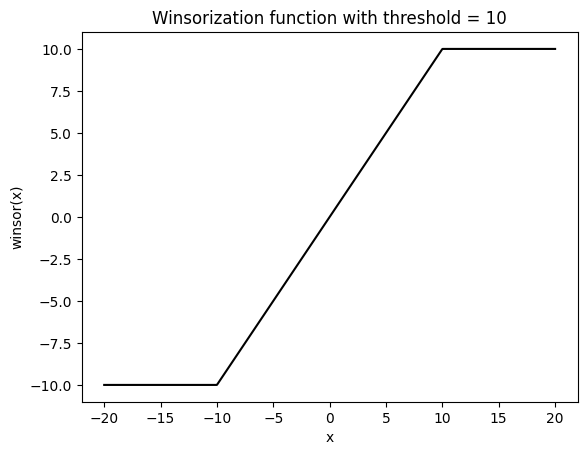

In [47]:
plt.plot(b, w, color = 'black')
plt.xlabel('x')
plt.ylabel('winsor(x)')
plt.title('Winsorization function with threshold = 10')

- First, using a transform to normalize the values of heart rate

In [48]:
heart_rate = heart_rate_df[["heart_rate"]]

In [49]:
heart_rate = (heart_rate - heart_rate.mean()) / (heart_rate.std())

In [50]:
heart_rate_df[["heart_rate"]] = heart_rate

In [51]:
heart_rate_df

,user_code,datetime,heart_rate,is_resting
0,007b8190cf,2020-04-26 04:49:25,-0.832462,0
1,01bad5a519,2020-04-23 06:21:03,-0.672808,0
2,01bad5a519,2020-04-23 09:46:01,-0.353499,0
3,01bad5a519,2020-04-23 14:05:06,-0.034191,0
4,01bad5a519,2020-04-24 03:41:18,-0.752635,0
...,...,...,...,...
523778,fe5ca7e4ea,2020-05-23 06:31:33,-0.233759,0
523779,fe6c1b1349,2020-05-07 12:05:04,-0.912289,0
523780,fe6c1b1349,2020-05-10 06:32:00,-0.832462,0
523781,fe6c1b1349,2020-05-12 06:31:42,-0.553067,0


In [52]:
(heart_rate >= 5).sum()

heart_rate    19
dtype: int64

- We can set threshold for winsorization to be 5 * standard_deviation = 5.
- By chooosing the threshold, we can choose which data points we call 'outliers'. This may vary from problem to problem, and is context dependent.

In [53]:
clipped_heart_rate = winsor(heart_rate.to_numpy(), 5)

In [54]:
heart_rate_df[["heart_rate"]] = clipped_heart_rate

In [55]:
heart_rate_df

,user_code,datetime,heart_rate,is_resting
0,007b8190cf,2020-04-26 04:49:25,-0.832462,0
1,01bad5a519,2020-04-23 06:21:03,-0.672808,0
2,01bad5a519,2020-04-23 09:46:01,-0.353499,0
3,01bad5a519,2020-04-23 14:05:06,-0.034191,0
4,01bad5a519,2020-04-24 03:41:18,-0.752635,0
...,...,...,...,...
523778,fe5ca7e4ea,2020-05-23 06:31:33,-0.233759,0
523779,fe6c1b1349,2020-05-07 12:05:04,-0.912289,0
523780,fe6c1b1349,2020-05-10 06:32:00,-0.832462,0
523781,fe6c1b1349,2020-05-12 06:31:42,-0.553067,0


### Perform data transformation as appropriate

- In the example below, we load the blood pressure csv data, consider a few columns of interest.
- Then we standardize / normalize them. That is the data transformation process we apply

In [56]:
blood_pressure = pd.read_csv("data/blood_pressure.csv")

In [57]:
blood_pressure.isna().sum(axis = 0)

user_code                     0
measurement_datetime          0
diastolic                     0
systolic                      0
functional_changes_index    422
circulatory_efficiency      422
kerdo_vegetation_index      438
robinson_index              422
dtype: int64

In [58]:
blood_pressure = blood_pressure.dropna()

In [59]:
blood_pressure_numeric = blood_pressure[["diastolic", "systolic", "functional_changes_index", "circulatory_efficiency", "kerdo_vegetation_index", "robinson_index"]]

In [60]:
bp_standardized = (blood_pressure_numeric - blood_pressure_numeric.mean()) / blood_pressure_numeric.std()

### Create at least one new feature and document your approach

- In the example below, we will create a boolean feature, called "is_high" (stage 1)
- If systolic is between 130 - 139 mm of Hg and diastolic is between 80 - 89 mm of Hg, is_high is True

In [61]:
dia = blood_pressure["diastolic"]
sys = blood_pressure["systolic"]

sys_high = np.logical_and(sys >= 130, sys <= 139)
dia_high = np.logical_and(dia >= 80, dia <= 89)

blood_pressure["is_high"] = np.logical_and(sys_high, dia_high).astype('bool')

In [62]:
blood_pressure[["is_high"]].sum()

is_high    11
dtype: int64

- There are 11 rows where bp measured is high

### Perform a dimensionality reduction method on the data and discuss

In [63]:
from sklearn.decomposition import PCA

In [64]:
pca = PCA(n_components = 2)

In [65]:
reduced_data = pca.fit_transform(bp_standardized)

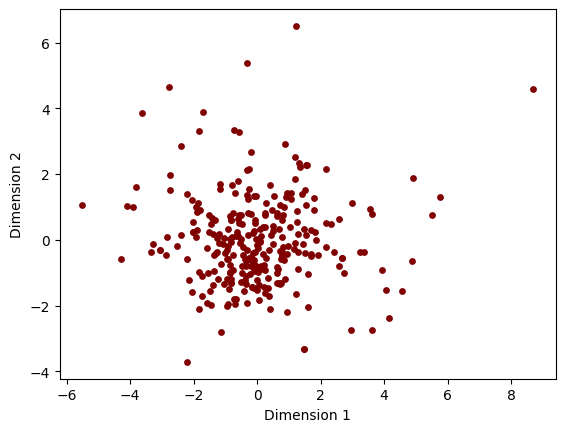

In [66]:
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s = 15, color = "maroon")

- After reduction, most of the data points seem to be centred around a circle centered at origin and radius 2

### Discussion around data quality assessment, including data profiling, data completeness, data accuracy, data consistency, data integrity, and data lineage and provenance

#### Data quality assessment

- Data quality assessment is a systematic process and involves the following steps:
    - Identifying requirements that align with the objective.
    - Choosing the relevant columns / dimensions for the problem and the business need.
    - Identify gaps, errors and reasons for the quality of the data.
    - Provide recommendations to improve the quality.
    - Create a report of the data gathering process, observations and conclusions.


#### Data profiling
- Profiling of this data was done as data was aggregated in different manners and statistics were shown. 
- It revealed that many of the rows in the sleep duration csv had many null values, so there was little data to be extracted from the additional features in that csv.
- On the contrary, the blood pressure data had significantly more populated values.

#### Data accuracy, consistency, integrity, lineage

- Consistency and accuracy of the data can be solidified by folks with more domain knowledge.
- For example, if it is a scientifically known claim that folks with below average blood pressures have longer sleep durations, then that fact could have been used to validate the two tables in this dataset.
- As for lineage, the data comes directly from the Welltory app. There could be some data transformation applied before it reaches us, but for the most part it is raw data that we have obtained